<a href="https://colab.research.google.com/github/DiabeticRetinopathy114/114_DR/blob/main/GaussianBlur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# 選擇圖片上傳
uploaded = files.upload()

Saving 3.png to 3.png


Image path: 3.png


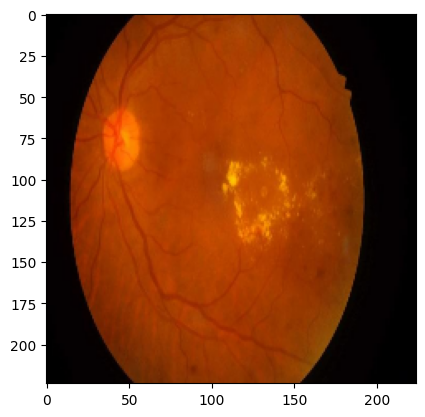

In [33]:
# 取得上傳的檔案名稱
image_path = next(iter(uploaded))  # 取得上傳的第一個檔名

print(f"Image path: {image_path}")

# 讀取並處理圖片
import cv2
# Use the uploaded image path instead of a hardcoded file name
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

plt.imshow(image)

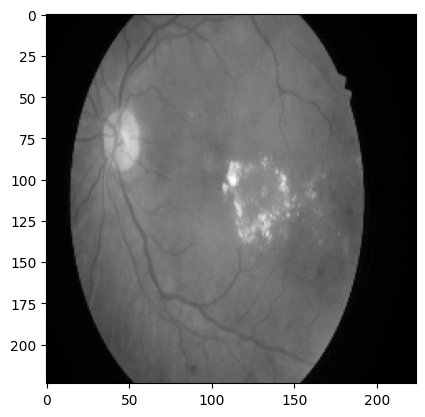

In [25]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#image=cv2.addWeighted ( image, 0 , cv2.GaussianBlur( image , (0 ,0 ) , 10) ,-4 ,128)
image = cv2.resize(image, (224, 224))

plt.imshow(image, cmap='gray')

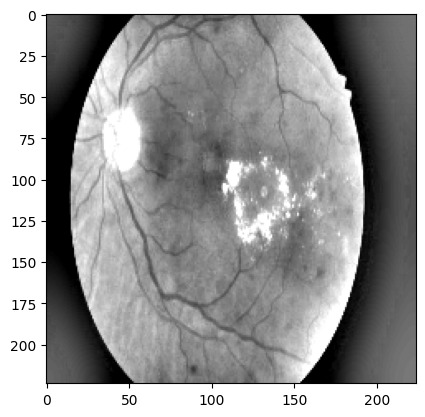

In [27]:
IMG_SIZE = 224
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128) # the trick is to add this line

plt.imshow(image, cmap='gray')

In [34]:
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance

    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol

        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [36]:
# OLD version of image color cropping, use crop_image_from_gray instead
# The above code work only for 1-channel. Here is my simple extension for 3-channels image
# def crop_image(img,tol=7):
#     if img.ndim ==2:
#         mask = img>tol
#         return img[np.ix_(mask.any(1),mask.any(0))]
#     elif img.ndim==3:
#         h,w,_=img.shape
# #         print(h,w)
#         img1=cv2.resize(crop_image1(img[:,:,0]),(w,h))
#         img2=cv2.resize(crop_image1(img[:,:,1]),(w,h))
#         img3=cv2.resize(crop_image1(img[:,:,2]),(w,h))

# #         print(img1.shape,img2.shape,img3.shape)
#         img[:,:,0]=img1
#         img[:,:,1]=img2
#         img[:,:,2]=img3
#         return img

'''all of these do not work'''

def crop_image2(image,threshold=5):
    if len(image.shape) == 3:
        flatImage = np.max(image, 2)
    else:
        flatImage = image
    assert len(flatImage.shape) == 2

    rows = np.where(np.max(flatImage, 0) > threshold)[0]
    if rows.size:
        cols = np.where(np.max(flatImage, 1) > threshold)[0]
        image = image[cols[0]: cols[-1] + 1, rows[0]: rows[-1] + 1]
    else:
        image = image[:1, :1]

    return image

def crop_image3(image):
    mask = image > 0

    # Coordinates of non-black pixels.
    coords = np.argwhere(mask)

    # Bounding box of non-black pixels.
    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1   # slices are exclusive at the top

    # Get the contents of the bounding box.
    cropped = image[x0:x1, y0:y1]
    return cropped

def crop_image4(image):
    _,thresh = cv2.threshold(image,1,255,cv2.THRESH_BINARY)
    contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    crop = image[y:y+h,x:x+w]
    return crop

In [37]:
def load_ben_color(path, sigmaX=10 ):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)

    return image

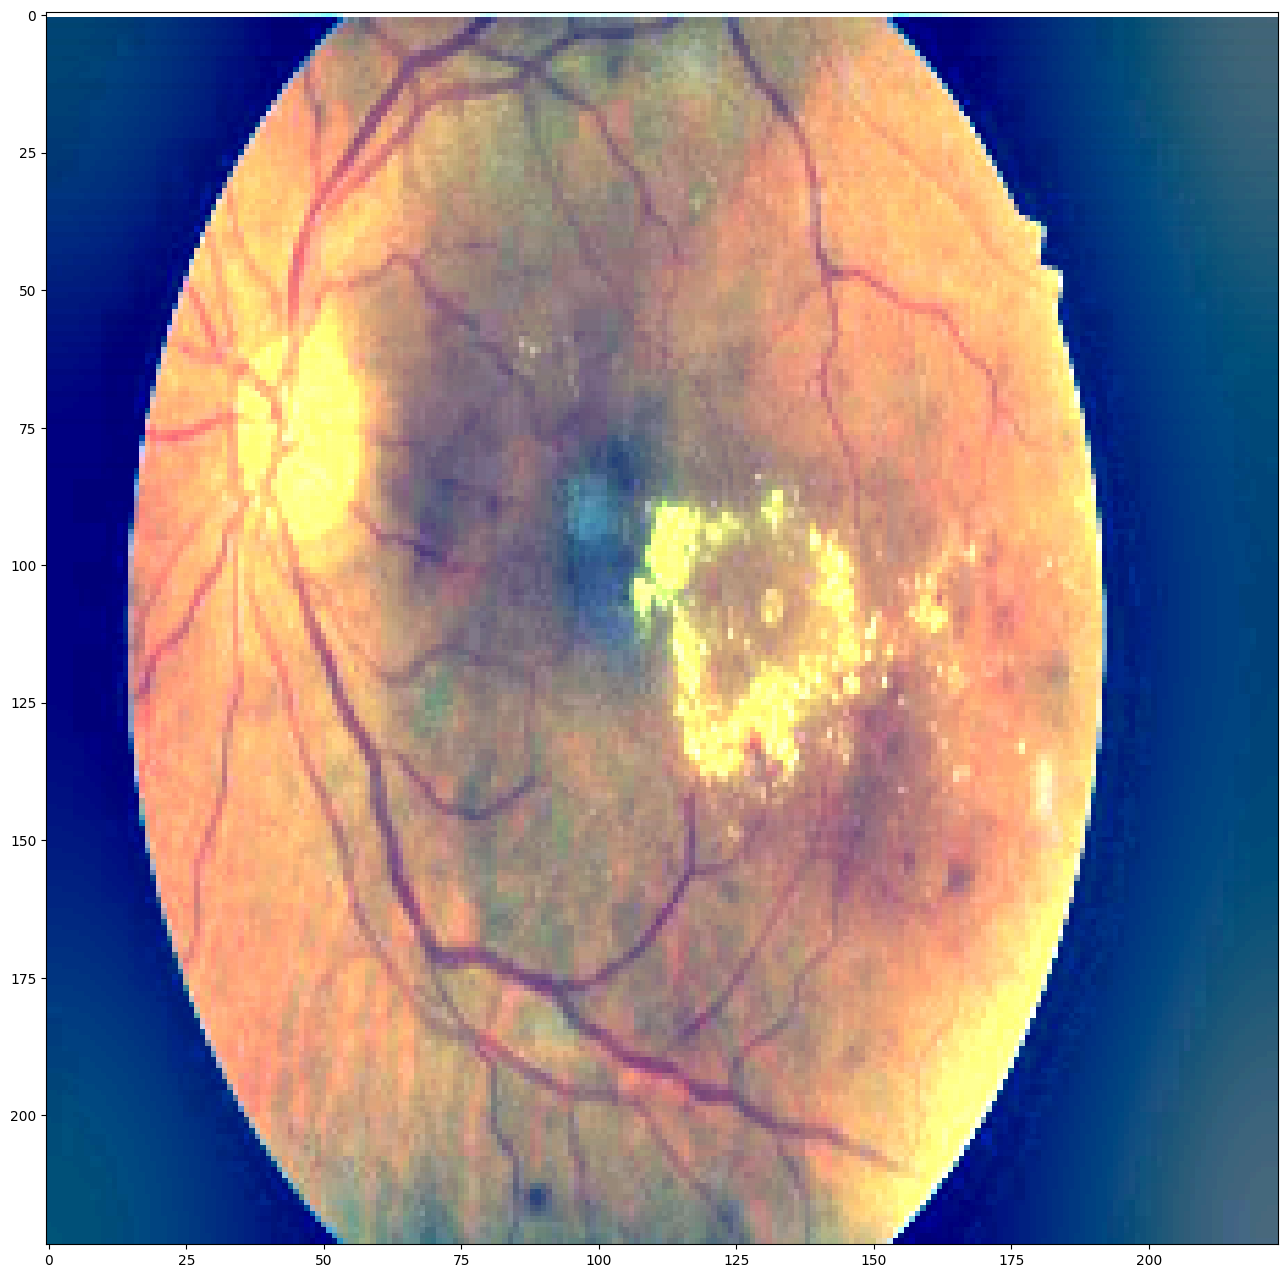

In [51]:
import numpy as np
# NUM_SAMP=7
fig = plt.figure(figsize=(25, 16))
# Provide the image_path variable as the 'path' argument
image = load_ben_color(path=image_path, sigmaX=30)

plt.imshow(image)

224 224


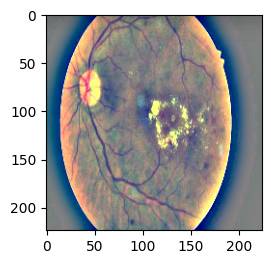

In [52]:
dpi = 80 #inch

image = load_ben_color(path=image_path,sigmaX=10)

height, width = IMG_SIZE, IMG_SIZE
print(height, width)

SCALE=1
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
plt.imshow(image, cmap='gray')

224 224


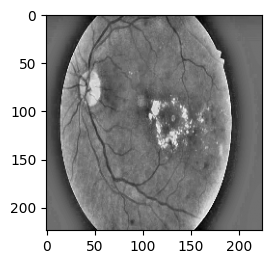

In [62]:
dpi = 80 #inch

image = load_ben_color(path=image_path,sigmaX=10)

height, width = IMG_SIZE, IMG_SIZE
print(height, width)

SCALE=1
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap='gray')

In [68]:
from fastai.vision import *
from datetime import datetime

import matplotlib.pyplot as plt

In [69]:
date = datetime.now().date()
time_now = datetime.now().time()
time = f"{time_now.hour}-{time_now.minute}-{time_now.second}"

In [70]:
classes = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

In [72]:
path = image_path

In [88]:
np.random.seed(42)
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4, bs=16).normalize(imagenet_stats)

NameError: name 'get_transforms' is not defined

In [54]:
from google.colab import files

# 選擇圖片上傳
uploaded = files.upload()

Saving 4.png to 4.png


In [56]:
# 取得上傳的檔案名稱
image_path2 = next(iter(uploaded))  # 取得上傳的第一個檔名

print(f"Image path: {image_path2}")

Image path: 4.png


224 224


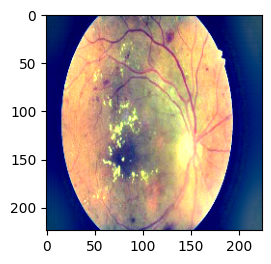

In [57]:
dpi = 80 #inch

image = load_ben_color(path=image_path2,sigmaX=30)
# image = cv2.imread(path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image = crop_image1(image)
# image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
# image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128)

height, width = IMG_SIZE, IMG_SIZE
print(height, width)

SCALE=1
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
plt.imshow(image, cmap='gray')

224 224


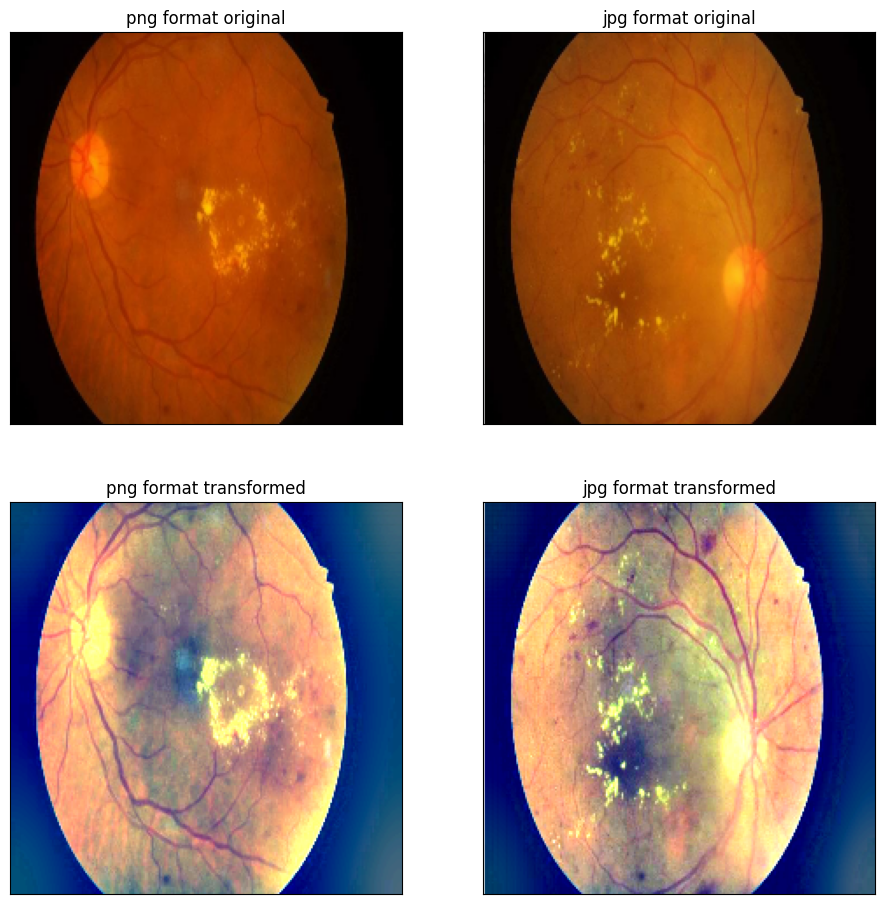

In [60]:
dpi = 80 #inch

# Pass the image path as a positional argument to cv2.imread
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Assuming crop_image is intended to be used here, but it's commented out
# image = crop_image(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

# Pass the image path as a positional argument to cv2.imread
image2 =  cv2.imread(image_path2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
# Assuming crop_image is intended to be used here, but it's commented out
# image2 = crop_image(image2)
image2 = cv2.resize(image2, (IMG_SIZE, IMG_SIZE))

height, width = IMG_SIZE, IMG_SIZE
print(height, width)

SCALE=1/4
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(2, 2, 1, xticks=[], yticks=[])
ax.set_title('png format original' )
plt.imshow(image, cmap='gray')
ax = fig.add_subplot(2, 2, 2, xticks=[], yticks=[])
ax.set_title('jpg format original' )
plt.imshow(image2, cmap='gray')

# Use the correct variables image_path and image_path2
# load_ben_color already performs cropping and resizing
image = load_ben_color(path=image_path,sigmaX=30)
image2 = load_ben_color(path=image_path2,sigmaX=30)

ax = fig.add_subplot(2, 2, 3, xticks=[], yticks=[])
ax.set_title('png format transformed' )
plt.imshow(image, cmap='gray')
ax = fig.add_subplot(2, 2, 4, xticks=[], yticks=[])
ax.set_title('jpg format transformed' )
plt.imshow(image2, cmap='gray')

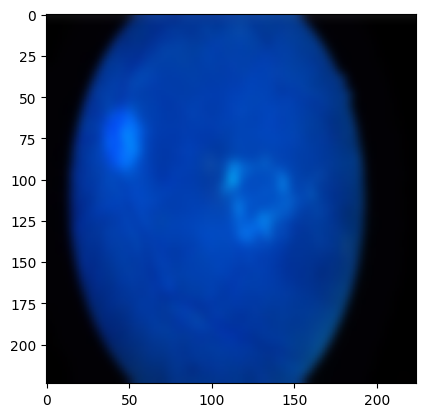

In [32]:
import matplotlib.pyplot as plt
# import cv2 # cv2 is already imported in the previous cell
# Use cv2_imshow from google.colab.patches instead of cv2.imshow
from google.colab.patches import cv2_imshow

plt.imshow(blurred_image)